In [18]:
from time import time
import math as m 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import os
from scipy.signal import fftconvolve
from scipy.stats import pearsonr, norm
from statsmodels.tsa.stattools import pacf
import requests as req
from urllib.parse import quote

In [19]:
def fftcrosscorr(X,Y):
    sigma_x,sigma_y = np.std(X),np.std(Y)
    mu_x,mu_y = np.mean(X),np.mean(Y)
    return fftconvolve((X-mu_x),(Y-mu_y)[::-1],'full')/(len(Y)*sigma_y*sigma_x)

def cc_plotter(X,Y):
    assert len(X)==len(Y)
    return plt.plot(np.arange(-len(X)+1,len(X)),fftcrosscorr(X,Y))

In [20]:
def bootstrapcchslag0(nboot,delta,X,Y):
    assert len(X)==len(Y)
    cchs = []
    splits = len(X)/delta 
    if len(X) % delta != 0: # if not perfectly divisible
        X = X[:-1*(len(X)%delta)] # cut off values
        Y = Y[:-1*(len(Y)%delta)]
    for i in range(nboot):
        lambdas1 = np.mean(np.vstack(np.hsplit(X,int(splits))),axis=1) # rows are the ts blocks, then does mean
        rand_ts1 = np.hstack(np.random.poisson(lambdas1,(delta,len(lambdas1))).T) # simulates poisson rvs according to means then concatenates 
        lambdas2 = np.mean(np.vstack(np.hsplit(Y,int(splits))),axis=1)
        rand_ts2 = np.hstack(np.random.poisson(lambdas2,(delta,len(lambdas2))).T) #(n,2) samples for 2 length parameter vector
        cchs.append(pearsonr(rand_ts1,rand_ts2)[0]) # collect zero lag cchs, #fftcrosscorr(rand_ts1,rand_ts2)[len(X)-1]
    return cchs,rand_ts1,rand_ts2

In [21]:
def bootstrapcchslag0_2(nboot,delta,X,Y):
    assert len(X)==len(Y)
    cchs = []
    splits = len(X)/delta 
    if len(X) % delta != 0: # if not perfectly divisible
        X = X[:-1*(len(X)%delta)] # cut off values
        Y = Y[:-1*(len(Y)%delta)]
    for i in range(nboot):
        means1 = np.mean(np.vstack(np.hsplit(X,int(splits))),axis=1)# rows are the ts blocks, then does mean
        var1 = np.std(np.vstack(np.hsplit(X,int(splits))),axis=1)
        rand_ts1 = np.hstack(np.random.normal(means1,var1,(delta,len(means1))).T) # simulates poisson rvs according to means then concatenates 
        means2 = np.mean(np.vstack(np.hsplit(Y,int(splits))),axis=1)
        var2 = np.std(np.vstack(np.hsplit(Y,int(splits))),axis=1)
        rand_ts2 = np.hstack(np.random.normal(means2,var2,(delta,len(means2))).T) #(n,2) samples for 2 length parameter vector
        cchs.append(pearsonr(rand_ts1,rand_ts2)[0]) # collect zero lag cchs, #fftcrosscorr(rand_ts1,rand_ts2)[len(X)-1]
    return cchs,rand_ts1,rand_ts2

In [5]:
def bootstrapcchslag0_3(nboot,delta,X,Y):
    assert len(X) == len(Y)
    cchs = []
    splits = len(X)/delta 
    if len(X) % delta != 0: # if not perfectly divisible
        X = X[:-1*(len(X)%delta)] # cut off values
        Y = Y[:-1*(len(Y)%delta)]
    for i in range(nboot):
        mu1 = np.median(np.vstack(np.hsplit(X,int(splits))),axis=1)# rows are the ts blocks, then does mean
        lambda1 = np.mean(np.abs(np.vstack(np.hsplit(X,int(splits)))-mu1.reshape(-1,1)),axis=1)
        rand_ts1 = np.hstack(np.random.laplace(mu1,lambda1,(delta,len(mu1))).T) # simulates poisson rvs according to means then concatenates 
        mu2 = np.median(np.vstack(np.hsplit(Y,int(splits))),axis=1)
        lambda2 = np.mean(np.abs(np.vstack(np.hsplit(Y,int(splits)))-mu2.reshape(-1,1)),axis=1)
        rand_ts2 = np.hstack(np.random.laplace(mu2,lambda2,(delta,len(mu2))).T) #(n,2) samples for 2 length parameter vector
        cchs.append(pearsonr(rand_ts1,rand_ts2)[0]) # collect zero lag cchs, #fftcrosscorr(rand_ts1,rand_ts2)[len(X)-1]
    return cchs,rand_ts1,rand_ts2

In [6]:
time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/bitcoinvblockchain.csv'))
bitcoin = np.asarray(time_series['Bitcoin'])
blockchain = np.asarray(time_series['Blockchain'])

time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/russiavsovietunion.csv'))
russia = np.asarray(time_series['Russia'])
sovietunion = np.asarray(time_series['Soviet Union'])

time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/frankvrocky.csv'))
frank_ocean = np.asarray(time_series['Frank Ocean'])
asap_rocky = np.asarray(time_series['ASAP Rocky'])

time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/tupacvbiggie.csv'))
tupac = np.asarray(time_series['Tupac Shakur'])
biggie = np.asarray(time_series['The Notorious B.I.G.'])

time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/nasavspacex.csv'))
nasa = np.asarray(time_series['NASA'])
spacex = np.asarray(time_series['SpaceX'])

time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/clintonvmainehs.csv'))
clinton = np.asarray(time_series['Hillary Clinton'])
mshs = np.asarray(time_series['Maine South High School'])

time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/clintonvtrump.csv'))
clinton = np.asarray(time_series['Hillary Clinton'])
trump = np.asarray(time_series['Donald Trump'])

time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/johnsonvhamill.csv'))
hamill = np.asarray(time_series['Mark Hamill'])
johnson = np.asarray(time_series['Rian Johnson'])

time_series = pd.read_csv(os.path.join(os.getcwd(),'datasets/rebelsvclonewars.csv'))
rebels = np.asarray(time_series['Star Wars Rebels'])
clonewars = np.asarray(time_series['Star Wars: The Clone Wars (2008 TV series)'])

topics_list = [(bitcoin,blockchain),(russia,sovietunion),(frank_ocean,asap_rocky),(tupac,biggie),
               (nasa,spacex),(clinton,mshs),(clinton,trump),(hamill,johnson),(rebels,clonewars)]

In [60]:
n = np.asarray(frank_ocean)
pauc = pacf(n,int(len(n)/4),'ywm')

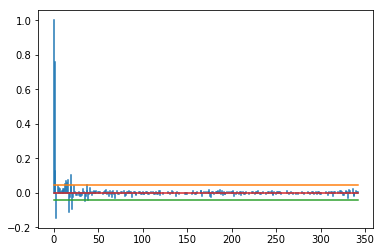

In [61]:
plt.stem(np.arange(0,int(len(n)/4)+1),pauc,markerfmt=' ')
z = (norm.ppf(0.95)/(len(n)**(1/2)))
plt.plot([0,int(len(n)/4)],z*np.ones(2))
plt.plot([0,int(len(n)/4)],-z*np.ones(2))

In [62]:
order = max(np.where(pauc>z)[0][-1],np.where(pauc<-z)[0][-1])
order

35

In [8]:
def pageviewsgetter(title): # expects a string
    r = req.get("https://wikimedia.org/api/rest_v1/metrics/pageviews/per-article/"+
                "en.wikipedia.org/all-access/user/{}/daily/20100407/20190507"
                .format(quote(title,safe='')))
    if int(str(r.status_code)[0]) == 2:
        response = r.json()['items'] # has to be uri encoded
        pageviews = [singledict['views'] for singledict in response]
    return pageviews #response